<a href="https://colab.research.google.com/github/VillaltaE/Geol_logging_dataset/blob/main/Geol_logging_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Exploratory analysis

##Reading data

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [140]:
#Read the data
df = pd.read_csv('https://raw.githubusercontent.com/VillaltaE/Geol_logging_dataset/refs/heads/main/force2020_data_unsupervised_learning.csv')

In [141]:
df.sample(5)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
15026,2.220922,39.131184,2779.088,0.199881,2.595240,102.703766
10372,2.112885,39.990852,2071.072,0.525167,2.934306,122.975365
7836,1.992623,57.856323,1685.600,0.480392,2.426298,141.152374
11913,2.211086,65.855659,2305.912,0.353346,3.299299,115.453026
17929,2.455962,86.680244,3220.344,0.286926,NaN,80.566475


In [142]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [143]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


<Axes: ylabel='RHOB'>

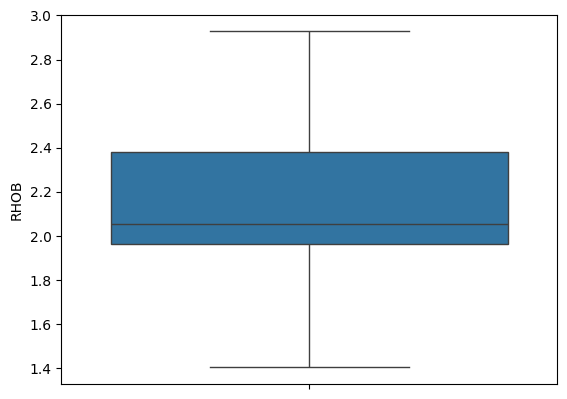

In [144]:
sns.boxplot(df['RHOB'])

<Axes: xlabel='RHOB', ylabel='Count'>

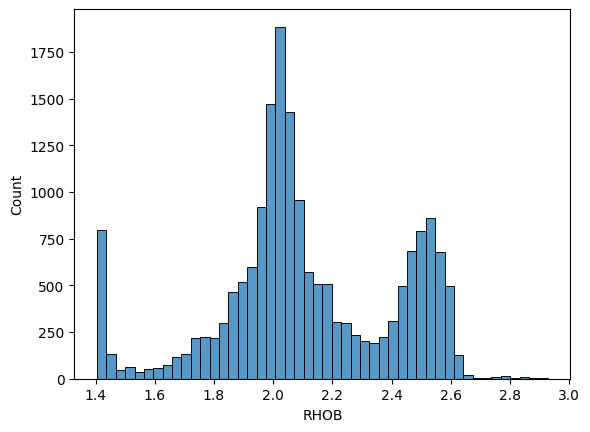

In [145]:
sns.histplot(df['RHOB'])

In [146]:
# Assign the value 2.84 to rows where RHOB is greater than 2.84
df.loc[df['RHOB'] > 2.84, 'RHOB'] = 2.84

# Display a sample of the modified DataFrame to confirm the change
print("DataFrame after setting RHOB > 2.84 to 2.84:")
df.sample(5)

DataFrame after setting RHOB > 2.84 to 2.84:


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
14382,2.559358,33.754444,2681.200,0.096058,5.809131,76.785889
14492,2.548671,30.610229,2697.920,0.200513,4.887227,77.812386
5168,1.969968,71.522629,1280.064,0.481301,2.444535,153.319702
10007,1.986379,43.170021,2015.592,0.569986,6.797621,144.191849
4969,1.904412,65.161766,1249.816,0.526685,2.433373,146.480225


<Axes: xlabel='RHOB', ylabel='Count'>

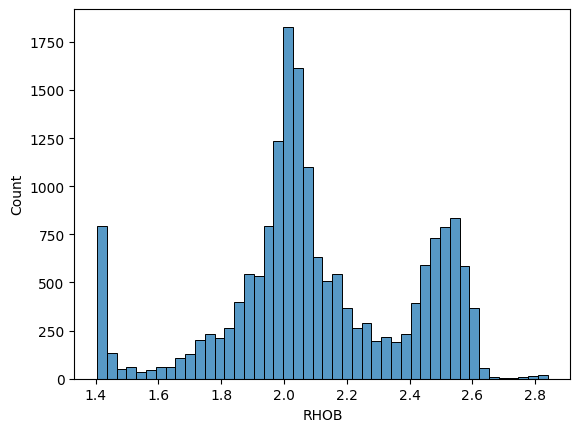

In [147]:
sns.histplot(df['RHOB'])

<Axes: ylabel='RHOB'>

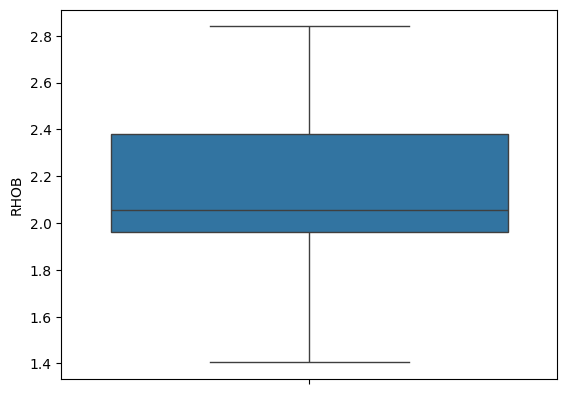

In [148]:
sns.boxplot(df['RHOB'])

In [149]:
# Filter out rows where GR is greater than 200
df_filtered_gr = df[df['GR'] <= 200].copy()

# Display the shape of the original and filtered DataFrames to confirm removal
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape (GR <= 200):", df_filtered_gr.shape)

# Display the max GR in the filtered DataFrame to verify
print("\nMax GR in filtered DataFrame:", df_filtered_gr['GR'].max())

Original DataFrame shape: (18270, 6)
Filtered DataFrame shape (GR <= 200): (18173, 6)

Max GR in filtered DataFrame: 197.17218018


In [150]:
df = df_filtered_gr

In [151]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [152]:
#Cleaning data
df_cleaned = df.dropna()
print("DataFrame original con valores nulos:")
display(df.isnull().sum())
print("\nDataFrame después de eliminar filas con valores nulos:")
display(df_cleaned.isnull().sum())

DataFrame original con valores nulos:


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81



DataFrame después de eliminar filas con valores nulos:


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


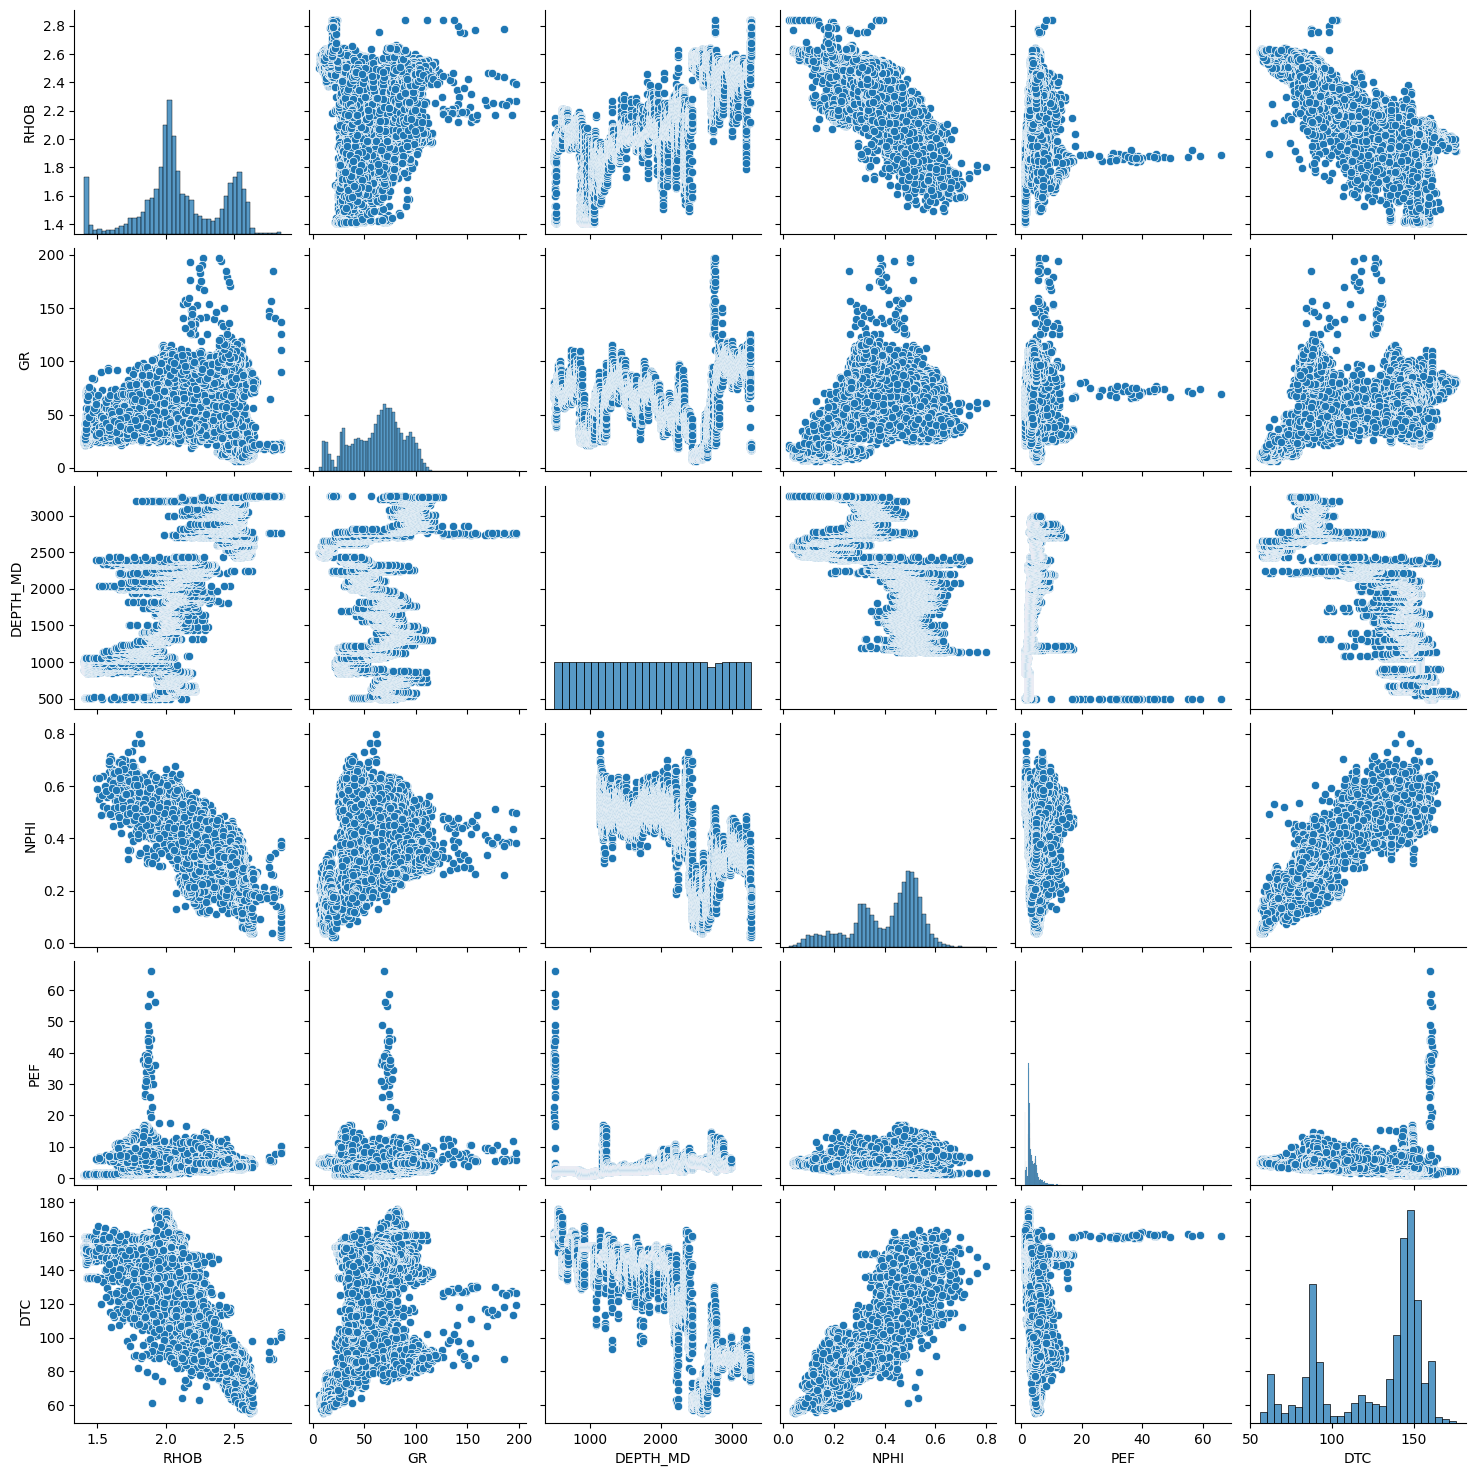

In [153]:
sns.pairplot(df)

<Axes: >

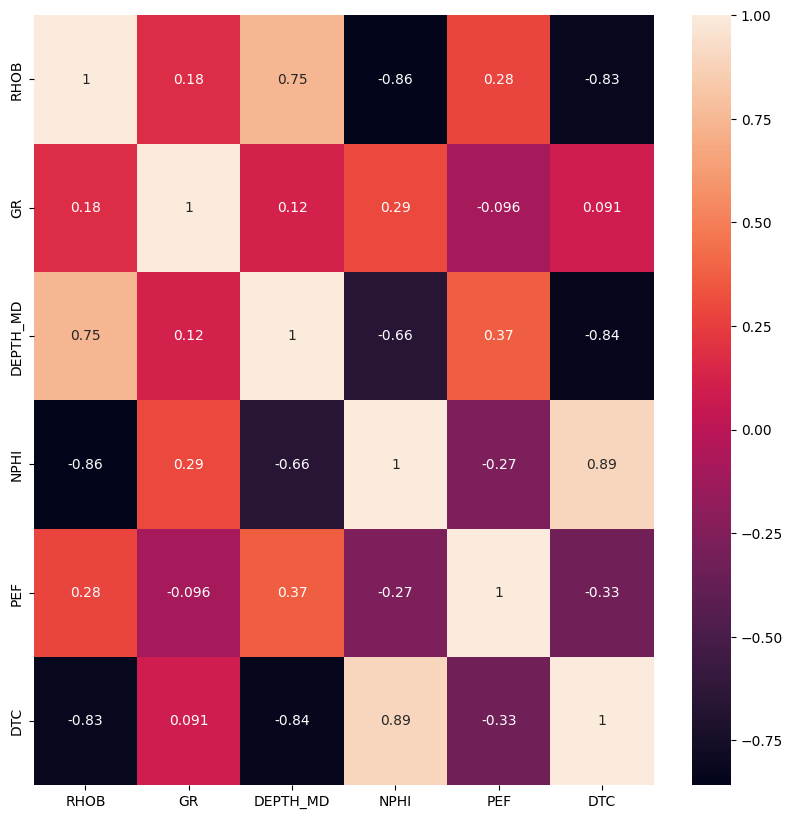

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

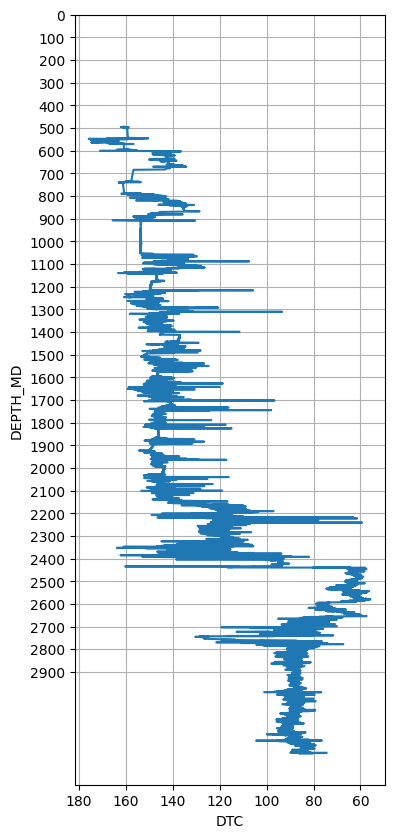

In [155]:
#DTC log
plt.figure(figsize=(4,10))
plt.plot((df['DTC']),df['DEPTH_MD'])
plt.xlabel('DTC')
plt.ylabel('DEPTH_MD')
plt.yticks(np.arange(0, 3000, 100))
plt.grid()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

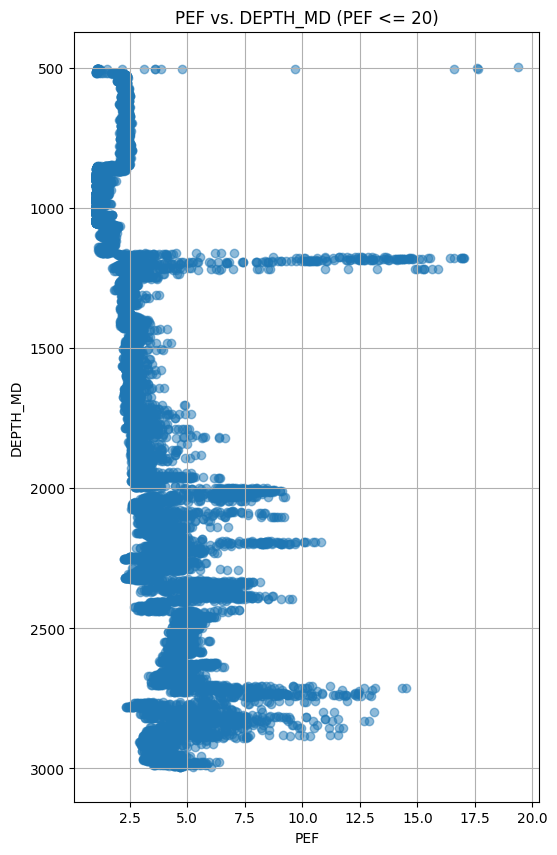

In [156]:
# Filter the DataFrame for PEF values up to 20
df_filtered_pef = df[df['PEF'] <= 20].copy()

plt.figure(figsize=(6, 10))
plt.scatter(df_filtered_pef['PEF'], df_filtered_pef['DEPTH_MD'], alpha=0.5) # Use filtered data
plt.xlabel('PEF')
plt.ylabel('DEPTH_MD')
plt.title('PEF vs. DEPTH_MD (PEF <= 20)') # Update title
plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.grid(True)
plt.show()

###PEF values greater than 10 indicate possible fractures or very permeable areas.

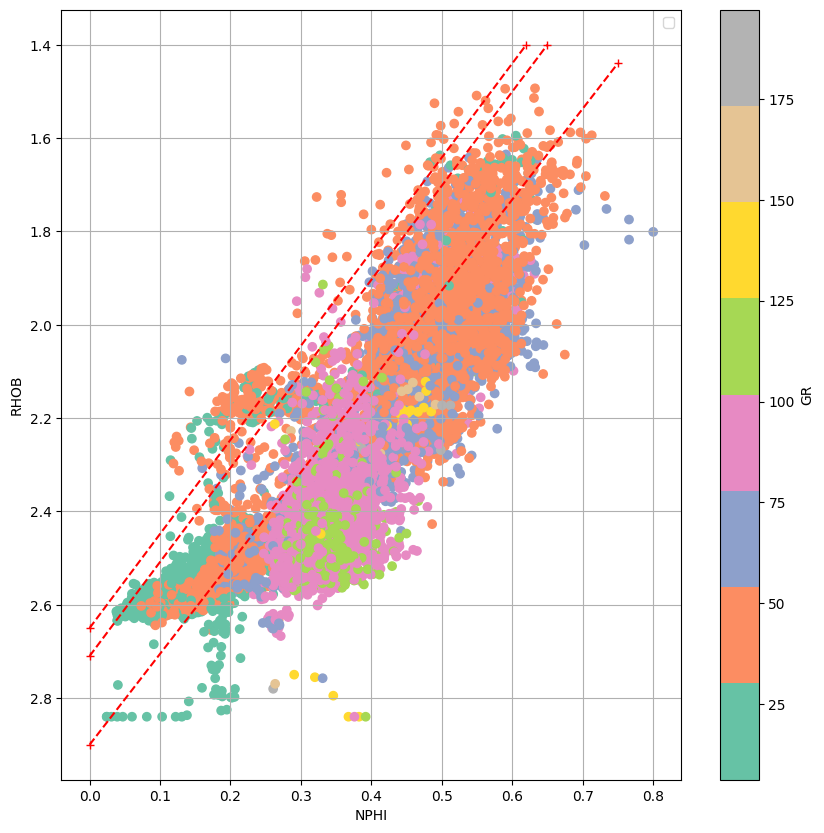

In [157]:
#Cross-plot NPHI,RHOB,GR
plt.figure(figsize=(10,10))
plt.scatter((df['NPHI']),df['RHOB'], c=df['GR'], cmap='Set2')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.colorbar(label='GR') # Add label to colorbar
plt.legend()
plt.grid()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

# Add a line connecting the two points
plt.plot([0, 0.62], [2.65, 1.4], color='red', linestyle='--', marker='+')
plt.plot([0.0, 0.65], [2.71, 1.4], color='red', linestyle='--', marker='+')
plt.plot([0.0,0.75],[2.9,1.44], color='red', linestyle='--', marker='+')

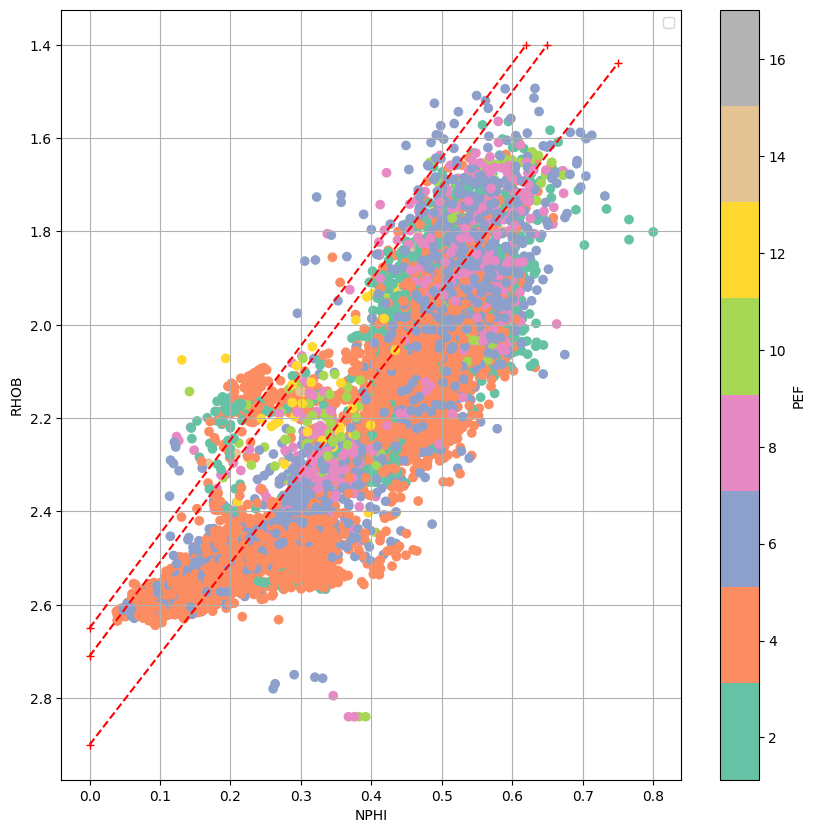

In [158]:
#Cross-plot NPHI,RHOB,PEF
plt.figure(figsize=(10,10))
plt.scatter((df['NPHI']),df['RHOB'], c=df['PEF'], cmap='Set2')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.colorbar(label='PEF') # Add label to colorbar
plt.legend()
plt.grid()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

# Add a line connecting the two points
plt.plot([0, 0.62], [2.65, 1.4], color='red', linestyle='--', marker='+')
plt.plot([0.0, 0.65], [2.71, 1.4], color='red', linestyle='--', marker='+')
plt.plot([0.0,0.75],[2.9,1.44], color='red', linestyle='--', marker='+')

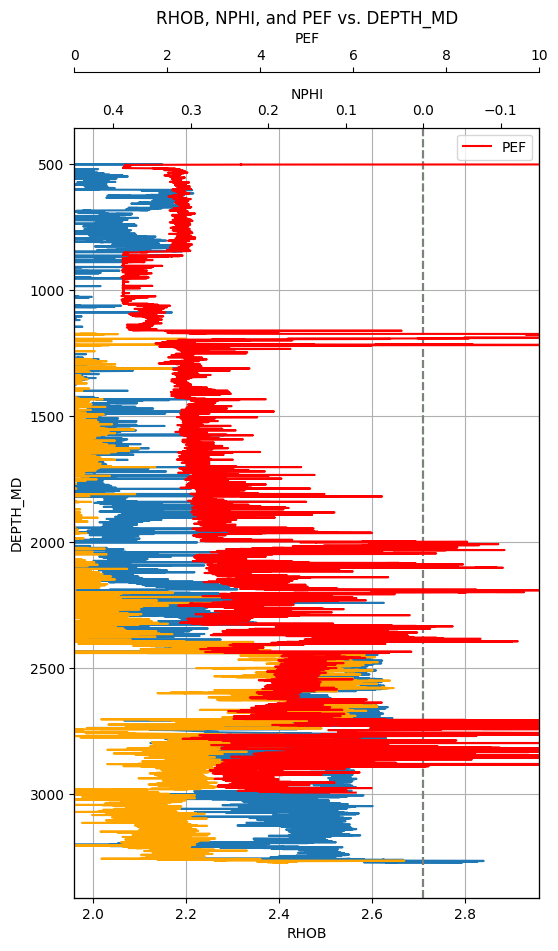

In [159]:
#Plot, RHOB, NPHI, PEF vs DEPTH_MD
plt.figure(figsize=(6,10)) # Increase figure width to accommodate three axes

# Plot RHOB
ax1 = plt.gca()
ax1.plot(df['RHOB'],df['DEPTH_MD'], label='RHOB')
ax1.set_xlabel('RHOB')
ax1.set_ylabel('DEPTH_MD')
ax1.set_xlim(1.96, 2.96) # Set x-limits for RHOB
ax1.invert_yaxis()
ax1.grid()
ax1.axvline(x=2.71, color='green', linestyle='--') # Add vertical line at RHOB = 2.71


# Plot NPHI on a twin x-axis
ax2 = ax1.twiny()
ax2.plot(df['NPHI'],df['DEPTH_MD'], label='NPHI', color='orange')
ax2.set_xlabel('NPHI')
ax2.set_xlim(0.45, -0.15) # Set x-limits for NPHI
ax2.axvline(x=0, color='gray', linestyle='--') # Add vertical line at NPHI = 0


# Plot PEF on a third twin x-axis
ax3 = ax1.twiny() # Create a third twin x-axis
# Offset the spine to the right to avoid overlapping with ax2
ax3.spines['top'].set_position(('outward', 40))
ax3.plot(df['PEF'],df['DEPTH_MD'], label='PEF', color='red')
ax3.set_xlabel('PEF')
ax3.set_xlim(0, 10) # Set x-limits for PEF


plt.title('RHOB, NPHI, and PEF vs. DEPTH_MD') # Update title
plt.legend(loc='upper right') # Add a legend and specify location to avoid overlap

plt.show()

#Porosity estimation with RHOB

Porosidad (%) =  [(ρma - ρb) / (ρma - ρf)] * 100

In [160]:
# matriz and fluid densities
RHOB_ma_sand =1.8
RHOB_ma_sandstone = 2.65
RHOB_ma_limestone = 2.71
RHOB_ma_dolomite = 2.84  # asumido
RHOB_f = 1.0

# Funtion to estimate PHIE
def calcular_phie(rhob):
    if rhob <= RHOB_ma_sand:
        rhob_ma = RHOB_ma_sand
    elif rhob < RHOB_ma_sandstone:
        rhob_ma = RHOB_ma_sandstone
    elif rhob < RHOB_ma_limestone:
        rhob_ma = RHOB_ma_limestone
    else:
        rhob_ma = RHOB_ma_dolomite

    return ((rhob_ma - rhob) / (rhob_ma - RHOB_f))

# Apply to  DataFrame
df['PHIE'] = df['RHOB'].apply(calcular_phie)


In [161]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180,0.464130
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470,0.460731
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615,0.456653
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429,0.459447
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342,0.466646


In [162]:
df['PHIE'].describe()

,PHIE
count,18173.000000
mean,0.286581
std,0.147718
min,0.000000
25%,0.126754
50%,0.345153
75%,0.398339
max,0.515002


<Axes: ylabel='PHIE'>

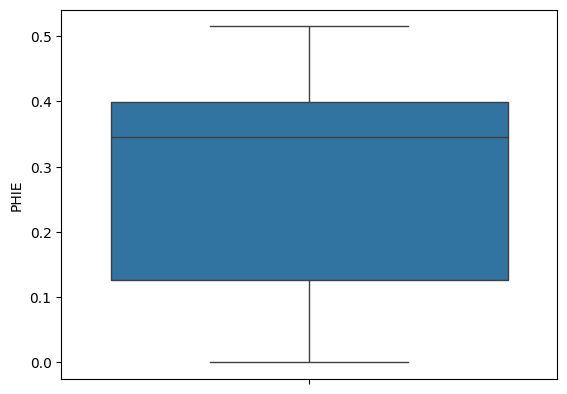

In [163]:
sns.boxplot(df['PHIE'])

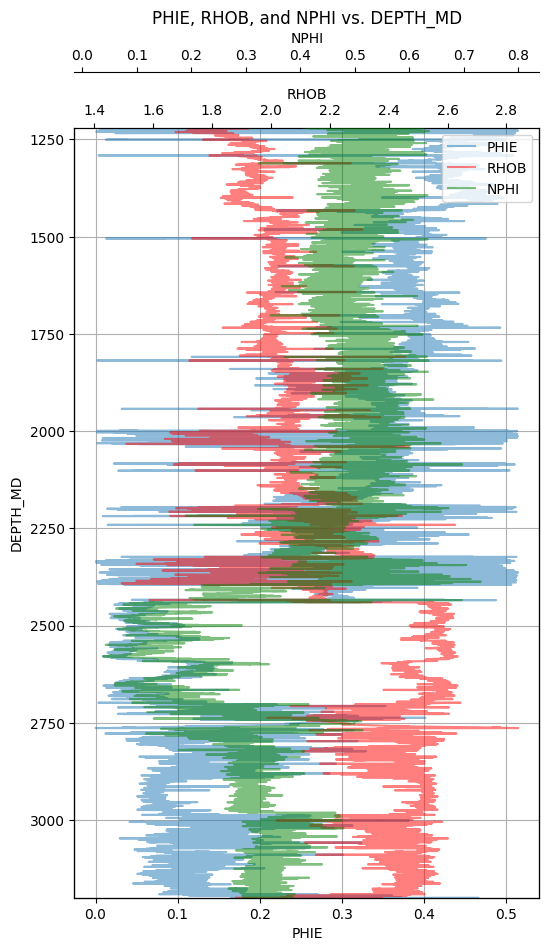

In [164]:
plt.figure(figsize=(6,10)) # Increase figure width to accommodate three axes
# Plot PHIE
ax1 = plt.gca()
ax1.plot(df['PHIE'], df['DEPTH_MD'], alpha=0.5, label='PHIE')
ax1.set_xlabel('PHIE')
ax1.set_ylabel('DEPTH_MD')
ax1.set_title('PHIE, RHOB, and NPHI vs. DEPTH_MD') # Update title
ax1.set_ylim(3200, 1220) # Set the y-axis limits (depth range)
ax1.grid(True)

# Plot RHOB on a twin x-axis
ax2 = ax1.twiny()
ax2.plot(df['RHOB'], df['DEPTH_MD'], alpha=0.5, color='red', label='RHOB')
ax2.set_xlabel('RHOB')

# Add legends for both axes
#Plot NPHI on a third twin x-axis
ax3 = ax1.twiny() # Create a third twin x-axis
# Offset the spine to the right to avoid overlapping with ax2
ax3.spines['top'].set_position(('outward', 40))
ax3.plot(df['NPHI'], df['DEPTH_MD'], alpha=0.5, color='green', label='NPHI')
ax3.set_xlabel('NPHI')

#Add legends for all axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

plt.show()

In [165]:
# Find the index of the row with the maximum GR value
max_gr_index = df['GR'].idxmax()

# Drop the row with the maximum GR value
df_no_max_gr = df.drop(max_gr_index)

# Verify the row has been removed
print("DataFrame original shape:", df.shape)
print("DataFrame after dropping max GR row shape:", df_no_max_gr.shape)
print("\nRow with max GR value:")
display(df.loc[max_gr_index])
print("\nDataFrame after dropping max GR row (head):")
display(df_no_max_gr.head())

DataFrame original shape: (18173, 7)
DataFrame after dropping max GR row shape: (18172, 7)

Row with max GR value:


,14852
RHOB,2.268490
GR,197.172180
DEPTH_MD,2752.640000
NPHI,0.498644
PEF,5.761769
DTC,126.289078
PHIE,0.231218



DataFrame after dropping max GR row (head):


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180,0.464130
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470,0.460731
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615,0.456653
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429,0.459447
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342,0.466646


In [166]:
df['GR'].iloc[14914]

np.float64(28.957696915)

In [167]:
df['GR'].max()

197.17218018

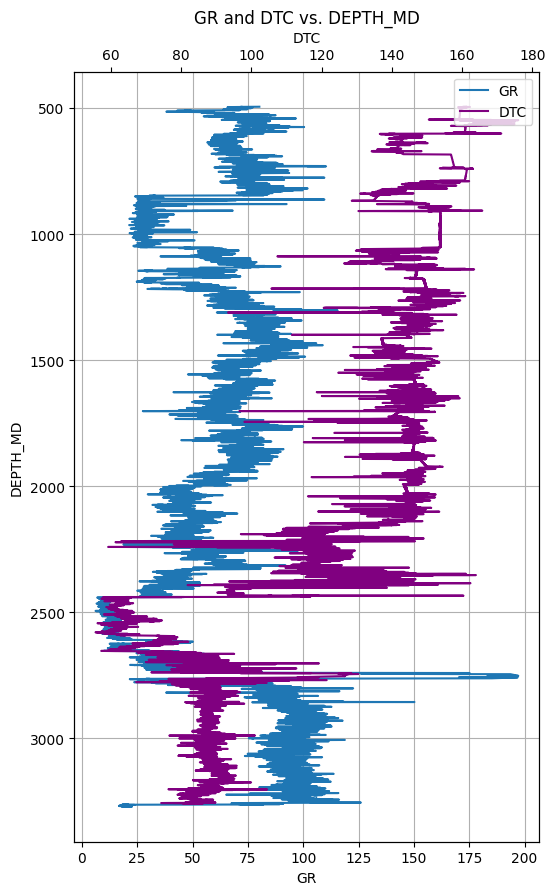

In [168]:
plt.figure(figsize=(6,10))

# Plot GR
ax1 = plt.gca()
ax1.plot(df['GR'], df['DEPTH_MD'], label='GR')
ax1.set_xlabel('GR')
ax1.set_ylabel('DEPTH_MD')
ax1.invert_yaxis()
ax1.grid()

# Plot DTC on a twin x-axis
ax2 = ax1.twiny()
ax2.plot(df['DTC'], df['DEPTH_MD'], label='DTC', color='purple')
ax2.set_xlabel('DTC')

plt.title('GR and DTC vs. DEPTH_MD')

# Add legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

#Porosity from DTC

##Wyllie equation

φ = (Δt - Δtma) / (Δtf - Δtma)

In [169]:
DTC_f = 200
DTC_ms = 55.5
DTC_ml = 47.6
DT_md =  43
cp = 1.25

In [170]:

# Parameters
DTC_f = 200
cp = 1.3

# Create conditions
condiciones = [
    df['DTC'] > 55.5,
    (df['DTC'] <= 55.5) & (df['DTC'] > 43),
    df['DTC'] <= 43
]

# Corresponding values for DTC_ma
valores_ma = [55.5, 47.6, 43]

# Assign DTC_ma according to conditions
DTC_ma = np.select(condiciones, valores_ma)

# Calcuate  PHI_S
df['PHI_S'] = ((df['DTC'] - DTC_ma) / (DTC_f - DTC_ma)) * (1 / cp)


In [171]:
df.sample(5)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S
9527,1.801003,69.010666,1942.632,0.550274,4.563614,148.536041,0.514544,0.495268
10358,2.063134,48.289181,2068.944,0.458028,3.089534,144.981064,0.355676,0.476343
5748,1.922233,80.976158,1368.224,0.564428,2.366718,146.821594,0.441071,0.486141
9521,2.022965,79.412201,1941.720,0.497414,2.937248,147.674561,0.380021,0.490682
15129,2.452265,79.795357,2794.744,0.298211,6.702976,86.687439,0.119839,0.166023


In [172]:
df['PHI_S'].describe()

,PHI_S
count,18092.000000
mean,0.370521
std,0.163411
min,0.001207
25%,0.187879
50%,0.457423
75%,0.492862
max,0.641220


<Axes: ylabel='PHI_S'>

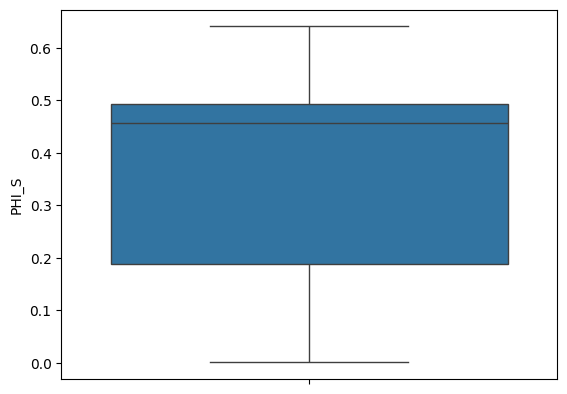

In [173]:
sns.boxplot(df['PHI_S'])

## Raymer-Hunt equation



φ = 0.63 * [1- Δtma/Δt]

In [174]:

# Create conditions
condiciones = [
    df['DTC'] > 55.5,
    (df['DTC'] <= 55.5) & (df['DTC'] > 43),
    df['DTC'] <= 43
]

# Corresponding values to  DTC_ma
valores_ma = [55.5, 47.6, 43]

# Assign DTC_ma according to conditions
DTC_ma = np.select(condiciones, valores_ma)

# Calculate  PHI_RH with equation : φ = 0.63 * (1 - DTC_ma / DTC)
df['PHI_RH'] = 0.63 * (1 - (DTC_ma / df['DTC']))


In [175]:
df['PHI_RH'].describe()

,PHI_RH
count,18092.000000
mean,0.327393
std,0.096855
min,0.002563
25%,0.244894
50%,0.382770
75%,0.393884
max,0.431282


<Axes: ylabel='PHI_RH'>

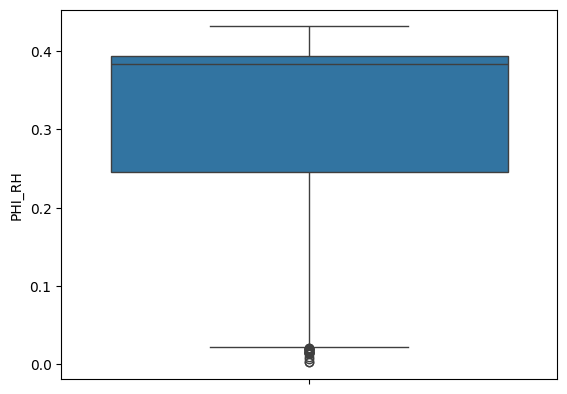

In [176]:
sns.boxplot(df['PHI_RH'])

In [177]:
correlation = df[['PHIE', 'PHI_RH', 'PHI_S']].corr()
display(correlation)

,PHIE,PHI_RH,PHI_S
PHIE,1.000000,0.788849,0.800009
PHI_RH,0.788849,1.000000,0.972724
PHI_S,0.800009,0.972724,1.000000


In [178]:
correlation = df[['RHOB','DTC']].corr()
display(correlation)

,RHOB,DTC
RHOB,1.000000,-0.825241
DTC,-0.825241,1.000000


In [179]:
#Adding VP to df en m/s
df['VP'] =(1/df['DTC'])*1000 * 0.3048
df.sample(5)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP
16141,2.544809,112.342453,2948.568,0.322708,3.929043,88.082161,0.063752,0.173448,0.233041,3.460406
15085,2.496033,48.441643,2788.056,0.213528,3.186010,83.415451,0.093313,0.148605,0.210833,3.653999
14026,2.440856,17.294634,2627.088,0.259813,5.857943,74.897102,0.126754,0.103258,0.163160,4.069583
17610,2.459150,105.256287,3171.856,0.309244,NaN,92.404495,0.115667,0.196457,0.251609,3.298541
16749,2.384099,95.590508,3040.984,0.361439,NaN,89.844330,0.161152,0.182828,0.240827,3.392535


## Estimate VS

 Castagna et al. (1993).

In [180]:
# Calculate VS based on the conditions
df['VS'] = np.nan  # Initialize VS column with NaN values

# Apply the first equation where GR < 40
df.loc[df['GR'] < 50, 'VS'] = 0.8042 * df['VP'] - 0.8559

# Apply the second equation where GR >= 40
df.loc[df['GR'] >= 50, 'VS'] = 0.77 * df['VP'] - 0.8674

# Display the updated DataFrame with the new 'VS' column
display(df.sample(5))

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP,VS
2164,2.139980,74.417229,823.456,NaN,2.387800,140.583054,0.309103,0.452931,0.381286,2.168113,0.802047
6627,1.968542,72.082558,1501.832,0.495307,2.347565,152.166092,0.413005,0.514592,0.400218,2.003074,0.674967
15214,2.526747,83.228622,2807.664,0.264304,4.655833,89.940132,0.074699,0.183338,0.241241,3.388921,1.742069
16607,2.255666,99.952927,3019.400,0.411659,NaN,87.064735,0.238991,0.168032,0.228402,3.500843,1.828249
2647,1.418964,27.839481,896.872,NaN,1.047900,152.717438,0.476295,0.517527,0.401048,1.995843,0.749157


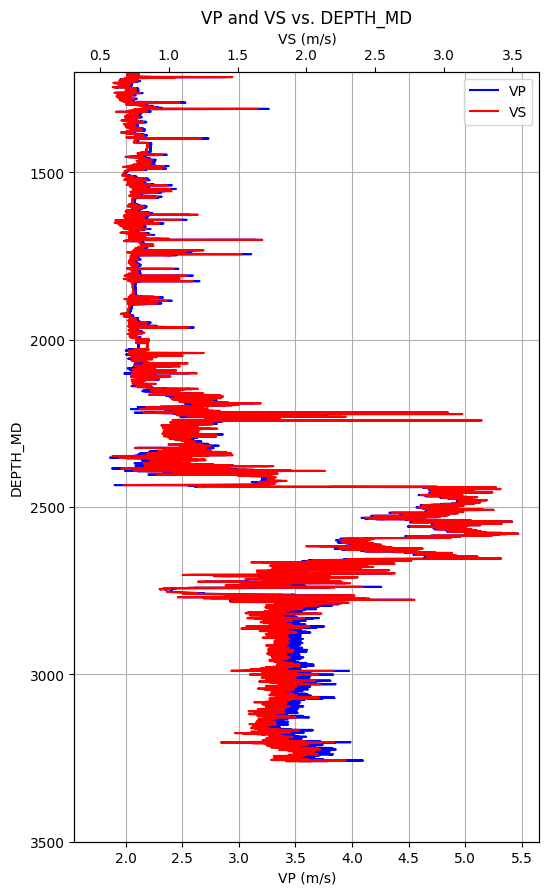

In [181]:
plt.figure(figsize=(6, 10))

# Plot DEPTH_MD and VP
ax1 = plt.gca()
ax1.plot(df['VP'], df['DEPTH_MD'], label='VP', color='blue')
ax1.set_xlabel('VP (m/s)')
ax1.set_ylabel('DEPTH_MD')
ax1.invert_yaxis()
ax1.grid()
ax1.set_ylim(3500, 1200) # Set the y-axis limits (depth range)


# Plot VS on a twin x-axis
ax2 = ax1.twiny()
ax2.plot(df['VS'], df['DEPTH_MD'], label='VS', color='red')
ax2.set_xlabel('VS (m/s)')


plt.title('VP and VS vs. DEPTH_MD')

# Add legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

In [182]:
# Filter the DataFrame for rows where DEPTH_MD is between 900 and 1000
depth_range_data = df[(df['DEPTH_MD'] >= 850) & (df['DEPTH_MD'] <= 900)]

# Display the VP and VS values for these rows
display(depth_range_data[['DEPTH_MD', 'VP', 'VS'][0:20]])

,DEPTH_MD,VP,VS
2339,850.056,2.243662,0.948453
2340,850.208,2.244644,0.949242
2341,850.360,2.244151,0.948847
2342,850.512,2.244032,0.948751
2343,850.664,2.244680,0.949272
...,...,...,...
2663,899.304,1.992927,0.746812
2664,899.456,1.993029,0.746894
2665,899.608,1.993140,0.746983
2666,899.760,1.993251,0.747072


## Shale  volume

IGR = GR -GRmin/GRmax -GRmin

In [183]:
df['VSHALE'] = (df['GR'] - df['GR'].min()) / (df['GR'].max() - df['GR'].min())

In [184]:
df.sample()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP,VS,VSHALE
10268,2.017562,47.373291,2055.264,0.523425,3.059078,148.391159,0.383296,0.494496,0.394373,2.054031,0.795952,0.215633


In [185]:
df['GR'].max()

197.17218018

In [186]:
df.sample()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP,VS,VSHALE
5742,1.907619,75.287415,1367.312,0.599686,2.286518,146.844528,0.449928,0.486263,0.391891,2.075665,0.730862,0.361795


In [187]:
df['VSAND']= 1 - df['VSHALE']

In [188]:
df.sample(5)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP,VS,VSHALE,VSAND
10396,2.011801,33.525085,2074.720,0.566137,3.431705,146.918182,0.386787,0.486655,0.392010,2.074624,0.812513,0.143122,0.856878
12844,2.539801,11.353362,2447.424,0.122735,4.963263,63.448917,0.066787,0.042315,0.078927,4.803864,3.007368,0.027028,0.972972
13903,2.457044,20.663044,2608.392,0.238636,4.143734,77.345604,0.116943,0.116293,0.177938,3.940754,2.313254,0.075775,0.924225
3998,1.777099,64.182762,1102.224,NaN,1.685600,143.105362,0.028626,0.466358,0.385670,2.129899,0.772622,0.303650,0.696350
2795,1.419363,25.818184,919.368,NaN,1.054978,153.759048,0.475796,0.523072,0.402599,1.982322,0.738284,0.102768,0.897232


In [189]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,PHIE,PHI_S,PHI_RH,VP,VS,VSHALE,VSAND
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180,0.464130,0.562317,0.413003,1.891626,0.589152,0.387523,0.612477
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470,0.460731,0.559507,0.412290,1.897842,0.593938,0.382611,0.617389
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615,0.456653,0.557219,0.411706,1.902935,0.597860,0.359358,0.640642
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429,0.459447,0.557090,0.411673,1.903223,0.598081,0.349184,0.650816
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342,0.466646,0.556978,0.411644,1.903473,0.598274,0.343164,0.656836


##Gardner equation

$\rho = \alpha V_{p}^{\beta}$


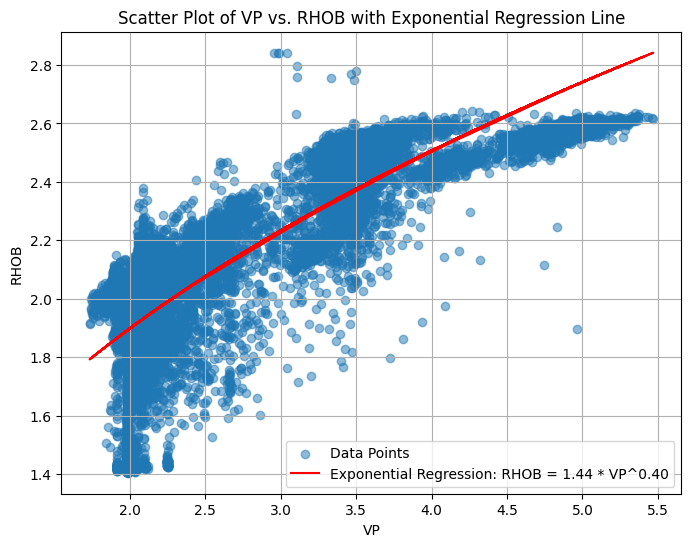

Exponential Regression Equation: RHOB = 1.44 * VP^0.40
R-squared (on log-transformed data): 0.5978632810552836


In [190]:
import statsmodels.api as sm

# Drop rows with NaN in 'RHOB' or 'VP' for regression
df_cleaned_exp_reg = df.dropna(subset=['VP', 'RHOB'])

# Apply logarithmic transformation to both 'RHOB' and 'VP'
df_cleaned_exp_reg['log_RHOB'] = np.log(df_cleaned_exp_reg['RHOB'])
df_cleaned_exp_reg['log_VP'] = np.log(df_cleaned_exp_reg['VP'])

# Perform linear regression on log-transformed data
X_exp_reg = df_cleaned_exp_reg['log_VP']  # log(VP) is the independent variable
y_exp_reg = df_cleaned_exp_reg['log_RHOB'] # log(RHOB) is the dependent variable
X_exp_reg = sm.add_constant(X_exp_reg) # Add a constant for the intercept

model_exp = sm.OLS(y_exp_reg, X_exp_reg).fit()
predictions_log_rhob = model_exp.predict(X_exp_reg)

# Transform predictions back to original scale
predictions_rhob = np.exp(predictions_log_rhob)

# Get the equation in exponential form
intercept_log = model_exp.params[0]
n_exp = model_exp.params[1]
c_exp = np.exp(intercept_log)
equation_exp = f'RHOB = {c_exp:.2f} * VP^{n_exp:.2f}'


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_exp_reg['VP'], df_cleaned_exp_reg['RHOB'], alpha=0.5, label='Data Points')

# Plot the exponential regression line
plt.plot(df_cleaned_exp_reg['VP'], predictions_rhob, color='red', label=f'Exponential Regression: {equation_exp}')

plt.xlabel('VP')
plt.ylabel('RHOB')
plt.title('Scatter Plot of VP vs. RHOB with Exponential Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Exponential Regression Equation:", equation_exp)
print("R-squared (on log-transformed data):", model_exp.rsquared)

## DTC, RHOB relationship

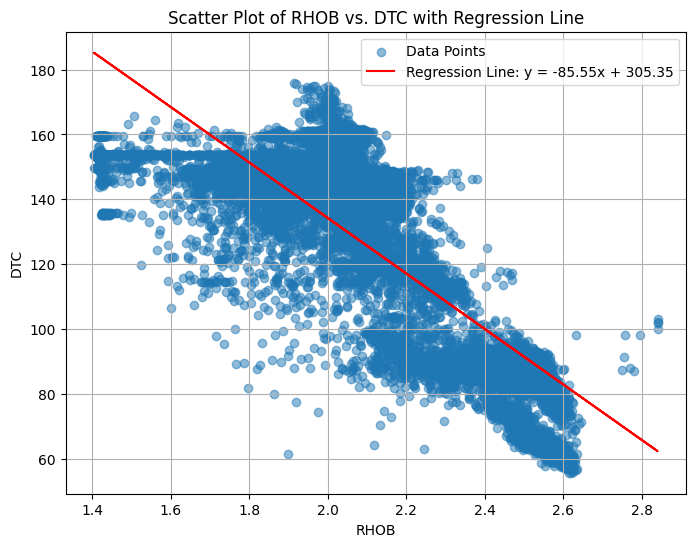

Regression Equation: y = -85.55x + 305.35


In [191]:
import statsmodels.api as sm

# Drop rows with NaN in 'RHOB' or 'DTC' for regression
df_cleaned_reg = df.dropna(subset=['RHOB', 'DTC'])

# Perform linear regression
X_reg = df_cleaned_reg['RHOB']
y_reg = df_cleaned_reg['DTC']
X_reg = sm.add_constant(X_reg) # Add a constant for the intercept

model = sm.OLS(y_reg, X_reg).fit()
predictions = model.predict(X_reg)

# Get the equation
intercept = model.params[0]
slope = model.params[1]
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_reg['RHOB'], df_cleaned_reg['DTC'], alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(df_cleaned_reg['RHOB'], predictions, color='red', label=f'Regression Line: {equation}')

plt.xlabel('RHOB')
plt.ylabel('DTC')
plt.title('Scatter Plot of RHOB vs. DTC with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Regression Equation:", equation)

#Classify NPHI, RHOB

In [192]:
from sklearn.cluster import KMeans

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score


In [194]:
from sklearn.impute import SimpleImputer
X = df.drop(['GR'], axis=1)
imputer = SimpleImputer(strategy='mean') # Instantiate SimpleImputer
X_imputed = imputer.fit_transform(X)
#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

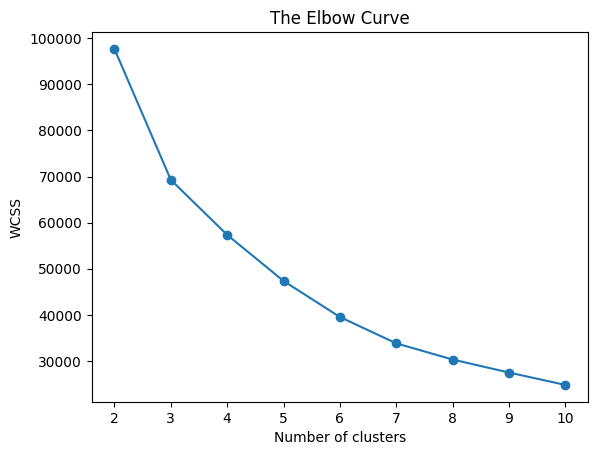

In [195]:
wcss=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100,n_init= 10,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(range(2,11),wcss,marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


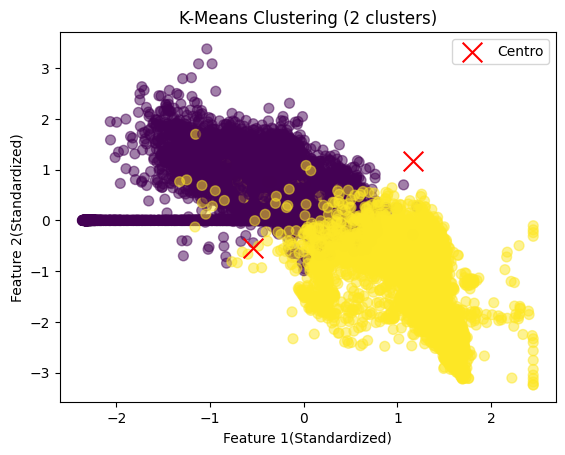

In [196]:
#Fit Kmeans with the chosen number of cluster
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200,n_init= 10,random_state=0)
kmeans.fit_predict(X_scaled)

#Get cluster labels
cluster_labels = kmeans.labels_

#Visualize the cluster in 2D (using the first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=cluster_labels, cmap='viridis',s=50,alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',marker = 'x', s=200, label='Centro')
plt.xlabel('Feature 1(Standardized)')
plt.ylabel('Feature 2(Standardized)')
plt.title('K-Means Clustering (2 clusters)')
plt.legend()
plt.show()

#Linear regression

Estimate DTC from PEF, RHOB, NPHI and GR

In [197]:
# Drop rows with missing values in 'NPHI' or 'PEF'
df_cleaned_nphi_pef = df.dropna(subset=['NPHI', 'PEF'])

# Display the shape of the original and cleaned DataFrames to confirm removal
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after dropping rows with missing NPHI or PEF:", df_cleaned_nphi_pef.shape)

# Display the number of missing values in the cleaned DataFrame to verify
print("\nMissing values in DataFrame after dropping rows with missing NPHI or PEF:")
display(df_cleaned_nphi_pef.isnull().sum())

Original DataFrame shape: (18173, 13)
DataFrame shape after dropping rows with missing NPHI or PEF: (12105, 13)

Missing values in DataFrame after dropping rows with missing NPHI or PEF:


,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0
PHIE,0
PHI_S,0
PHI_RH,0
VP,0


In [198]:
df=df_cleaned_nphi_pef

In [199]:
# import train_test_split
from sklearn.model_selection import train_test_split
y = df['DTC']
X = df.drop(['DTC','PHIE','PHI_S','PHI_RH','VP','VS','VSHALE','VSAND','DEPTH_MD'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # garantizar la reproductibilidad de ka segregacion de los datos

In [200]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['DTC'] = y_train


In [201]:
#adicionando o constante
X_train= sm.add_constant(X_train)

In [202]:
# ajustando el primer modelo
modelo =sm.OLS(y_train,X_train).fit()

In [203]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTC   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.860e+04
Date:                Sun, 27 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:25:37   Log-Likelihood:                -31335.
No. Observations:                8473   AIC:                         6.268e+04
Df Residuals:                    8468   BIC:                         6.272e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.8509      2.625     83.753      0.000     214.705     224.997
RHOB         -60.3322      0.940    -64.149      0.000     -62.176     -58.489
GR             0.0939      0.005     18.691      0.000       0.084       0.104
NPHI          86.9574      1.836     47.351      0.000      83.358      90.557
PEF           -2.7047      0.062    -43.582      0.000      -2.826      -2.583
==============================================================================
Omnibus:                      920.562   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3698.134
Skew:                          -0.488   Prob(JB):                         0.00
Kurtosis:                       6.086   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
import plotly.express as px

In [205]:
y_previsto_train =  modelo.predict(X_train)

In [206]:
# Get the equation from the model summary
# The coefficients are in modelo.params, and the independent variables are in X_train_imputed.columns
# We need to reconstruct the equation string based on the fitted model

# Get coefficients and feature names (excluding the constant)
coefficients = modelo.params[1:]
feature_names = modelo.params.index[1:]
intercept = modelo.params[0]

# Construct the equation string
equation_parts = [f"{coef:.2f}*{name}" for coef, name in zip(coefficients, feature_names)]
equation = f"DTC = {intercept:.2f} + " + " + ".join(equation_parts)

fig = px.scatter(x=y_previsto_train, y=y_train,
                 title=f'Previsto vs Real<br><sup>Equation: {equation}</sup>',
                 labels={'x':'DTC previsto','y':'DTC real'})
fig.show()

In [207]:
# Residues
residuos = modelo.resid

In [208]:
#Residuos
import plotly.express as px
fig =px.scatter(x=y_previsto_train, y=residuos,title= 'Valor previsto vs Residuos',
                labels={'x' :'Valor previsto' , 'y': 'Residuos'})
fig.show()